In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [11]:
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

## Sigmoid Function
$sigmoid(x) = \frac{1}{1+e^{-x}}$
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [2]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [3]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

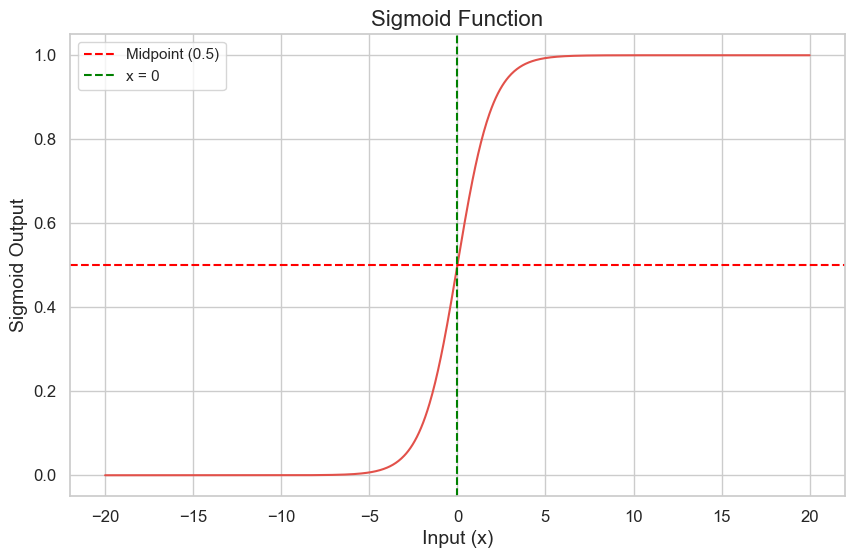

In [12]:
x_inputs = np.linspace(-20, 20, 1000)
sig = sigmoid(x_inputs)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_inputs, y=sig)

# Add labels and title for clarity
plt.axhline(0.5, color='r', linestyle='--', label="Midpoint (0.5)")  # Highlight y=0.5
plt.axvline(0, color='g', linestyle='--', label="x = 0")  # Highlight x=0
plt.title('Sigmoid Function', fontsize=16)
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('Sigmoid Output', fontsize=14)

# Show the plot with legend
plt.legend()
plt.show()

## Sigmoid gradient
$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$

In [4]:
def sigmoid_gradient(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

In [13]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_gradient(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


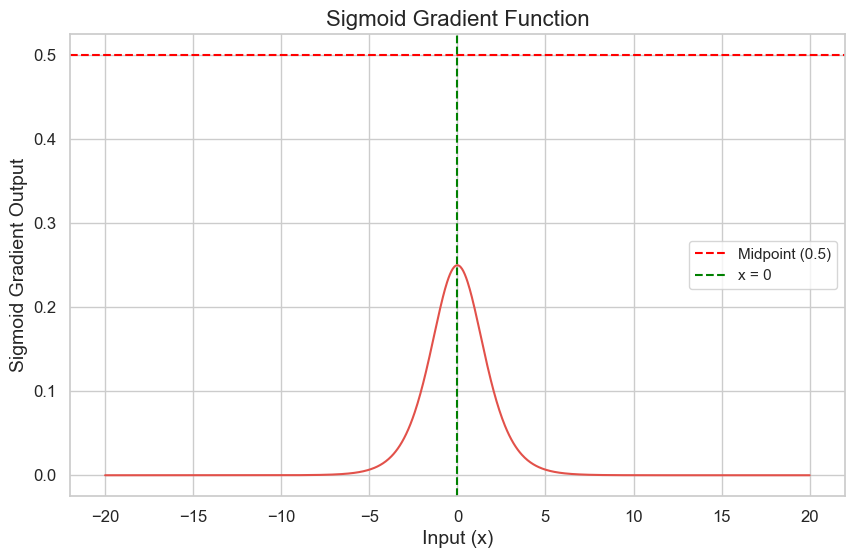

In [15]:
x_inputs = np.linspace(-20, 20, 1000)
sig = sigmoid_gradient(x_inputs)

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_inputs, y=sig)

# Add labels and title for clarity
plt.axhline(0.5, color='r', linestyle='--', label="Midpoint (0.5)")  # Highlight y=0.5
plt.axvline(0, color='g', linestyle='--', label="x = 0")  # Highlight x=0
plt.title('Sigmoid Gradient Function', fontsize=16)
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('Sigmoid Gradient Output', fontsize=14)

# Show the plot with legend
plt.legend()
plt.show()

## Reshaping arrays

In [16]:
def image2vector(image):
    vector = image.reshape((image.shape[0] * image.shape[1] * image.shape[2], 1))
    return vector

In [17]:
# more robust way to do it
def imagetovector(image):
    vector = image.reshape(-1, 1)
    return vector

In [18]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


In [19]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(imagetovector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


## Normalizing rows
$$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$

In [20]:
def normalize_rows(x):
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
    return x / x_norm

In [21]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalize_rows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


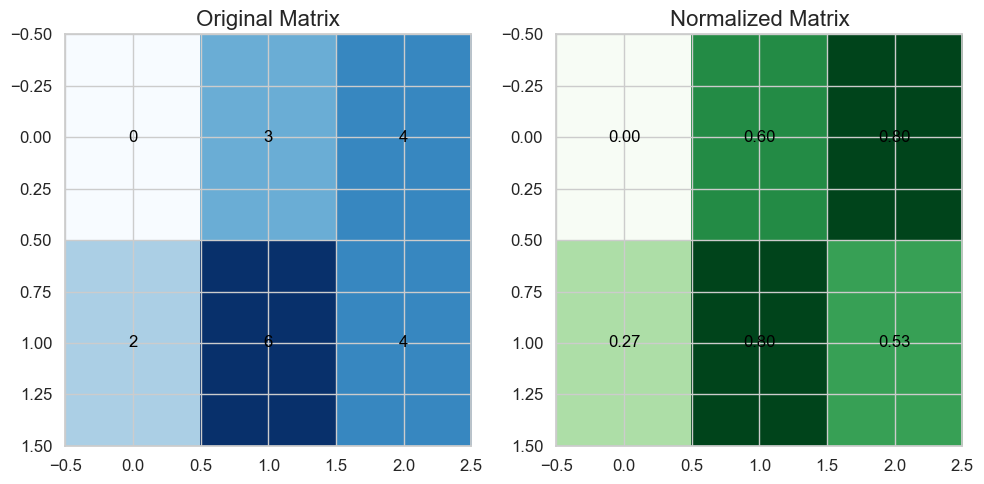

In [23]:
x = np.array([[0, 3, 4],
              [2, 6, 4]])

# Normalized matrix
normalized_x = normalize_rows(x)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Visualize original matrix
ax[0].imshow(x, cmap='Blues', aspect='auto')
ax[0].set_title("Original Matrix")
for (i, j), val in np.ndenumerate(x):
    ax[0].text(j, i, f'{val}', ha='center', va='center', color='black')

# Visualize normalized matrix
ax[1].imshow(normalized_x, cmap='Greens', aspect='auto')
ax[1].set_title("Normalized Matrix")
for (i, j), val in np.ndenumerate(normalized_x):
    ax[1].text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## The Softmax function

- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [24]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp / x_sum
    return s

In [25]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


## Implement the L1 and L2 loss functions
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [27]:
def L1(yhat, y):
    loss = np.sum(abs(y - yhat))
    return loss

In [28]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [31]:
def L2(yhat, y):
    x = yhat - y
    loss = np.dot(x, x)
    return loss

In [32]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43
